## Model Expansion

In regression, the analyst is free to transform the predictor variables and/or the response variable in an effort to better 'explain' the response variable as a function of the predictor variables.

It is also possible to augment (or enrich) the model by creating new predictor variables out of the existing ones.

Suppose there is only one predictor variable, and both the response and the predictor variable are numerical, so that the data are of the form
$$
\left(x_1, y_1\right), \ldots,\left(x_n, y_n\right)
$$
with both variables being real-valued.

Without any transformation or augmentation, linear regression fits a model of the form
$$
b_0+b_1 x
$$


### Polynomial models



While this model is restrictive, we are free to <span style="color: orange;">augment</span>
 it into a polynomial model of the form
$$
b_0+b_1 x+\cdots+b_d x^d
$$

If we use squared loss, we are targeting
$$
\left(\beta_0, \beta_1, \ldots, \beta_d\right)=\underset{\left(b_0, b_1, \ldots, b_d\right)}{\arg \min } \mathbb{E}\left[\left(y-b_0-b_1 x-\cdots-b_d x^d\right)^2\right]
$$

Fitting to data requires minimizing the corresponding empirical risk
$$
\left(\widehat{\beta}_0, \widehat{\beta}_1, \ldots, \widehat{\beta}_d\right)=\underset{\left(b_0, b_1, \ldots, b_d\right)}{\arg \min } \frac{1}{n} \sum_{i=1}^n \left(y_i-b_0-b_1 x_i-\cdots-b_d x_i^d\right)^2
$$

We note that the degree of the polynomial model, denoted $p$ above, is parameter of the model that needs to set by the analyst.

**Manual choice**: The degree can be set by hand, e.g., by visual inspection of how well a model fits a scatterplot of the data.

**Data-driven choice**: It can be chosen based on a model selection procedure, e.g., by comparing models sequentially via ANOVA or, equivalently, by tracking the $R^2$.

This is possible because the polynomial model with degree $d$ is a submodel of the polynomial model with degree $d+1$, meaning
$$
\operatorname{poly}(d) \subset \operatorname{poly}(d+1)
$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from numpy.linalg import cond
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

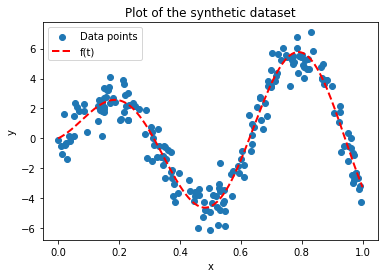

In [2]:
# Data generating 
def f(x):
    return (1 + 10 * x - 5 * x**2) * np.sin(10 * x)

# Set the number of data points
n = 200

# Generate n uniform random numbers between 0 and 1, then sort them
x = np.sort(np.random.uniform(0, 1, n))

# Generate y values based on the function f and add normal noise
y = f(x) + np.random.normal(size=n)

# Plotting the data points
plt.scatter(x, y, label='Data points')

# Generate a sequence of 1000 numbers between 0 and 1 for plotting the function
t = np.linspace(0, 1, 1000)

# Plot the function
plt.plot(t, f(t), 'r', linewidth=2, linestyle='dashed', label='f(t)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the synthetic dataset')
plt.legend()

# Show the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.642
Date:                Fri, 17 May 2024   Prob (F-statistic):            0.00162
Time:                        14:00:59   Log-Likelihood:                -510.34
No. Observations:                 200   AIC:                             1027.
Df Residuals:                     197   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5701      0.659      2.381      0.0

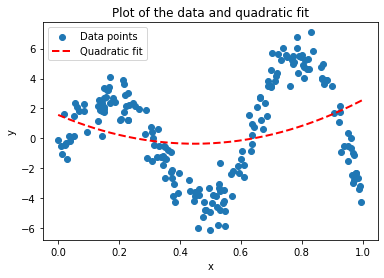

In [3]:
# Convert x and y into a pandas DataFrame for use with statsmodels
data = pd.DataFrame({'x': x, 'y': y})

# Fit a quadratic model, similar to R's lm function
# The formula 'y ~ x + I(x**2)' specifies a quadratic model
model = smf.ols(formula='y ~ x + I(x**2)', data=data).fit()

# Print the summary of the model
print(model.summary())

# Get the design matrix (like model.matrix in R)
# print(model.model.exog)

# Plot the original data
plt.scatter(x, y, label='Data points')

# Generate predictions from the model for the t values
t_df = pd.DataFrame({'x': np.linspace(0, 1, 1000)})
fhat = model.predict(t_df)

# Add the quadratic fit to the plot
plt.plot(t_df['x'], fhat, color='red', linewidth=2, linestyle='dashed', label='Quadratic fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the data and quadratic fit')
plt.legend()

**Manual choice**: The degree can be set by hand, e.g., by visual inspection of how well a model fits a scatterplot of the data.



/Users/somak/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/somak/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


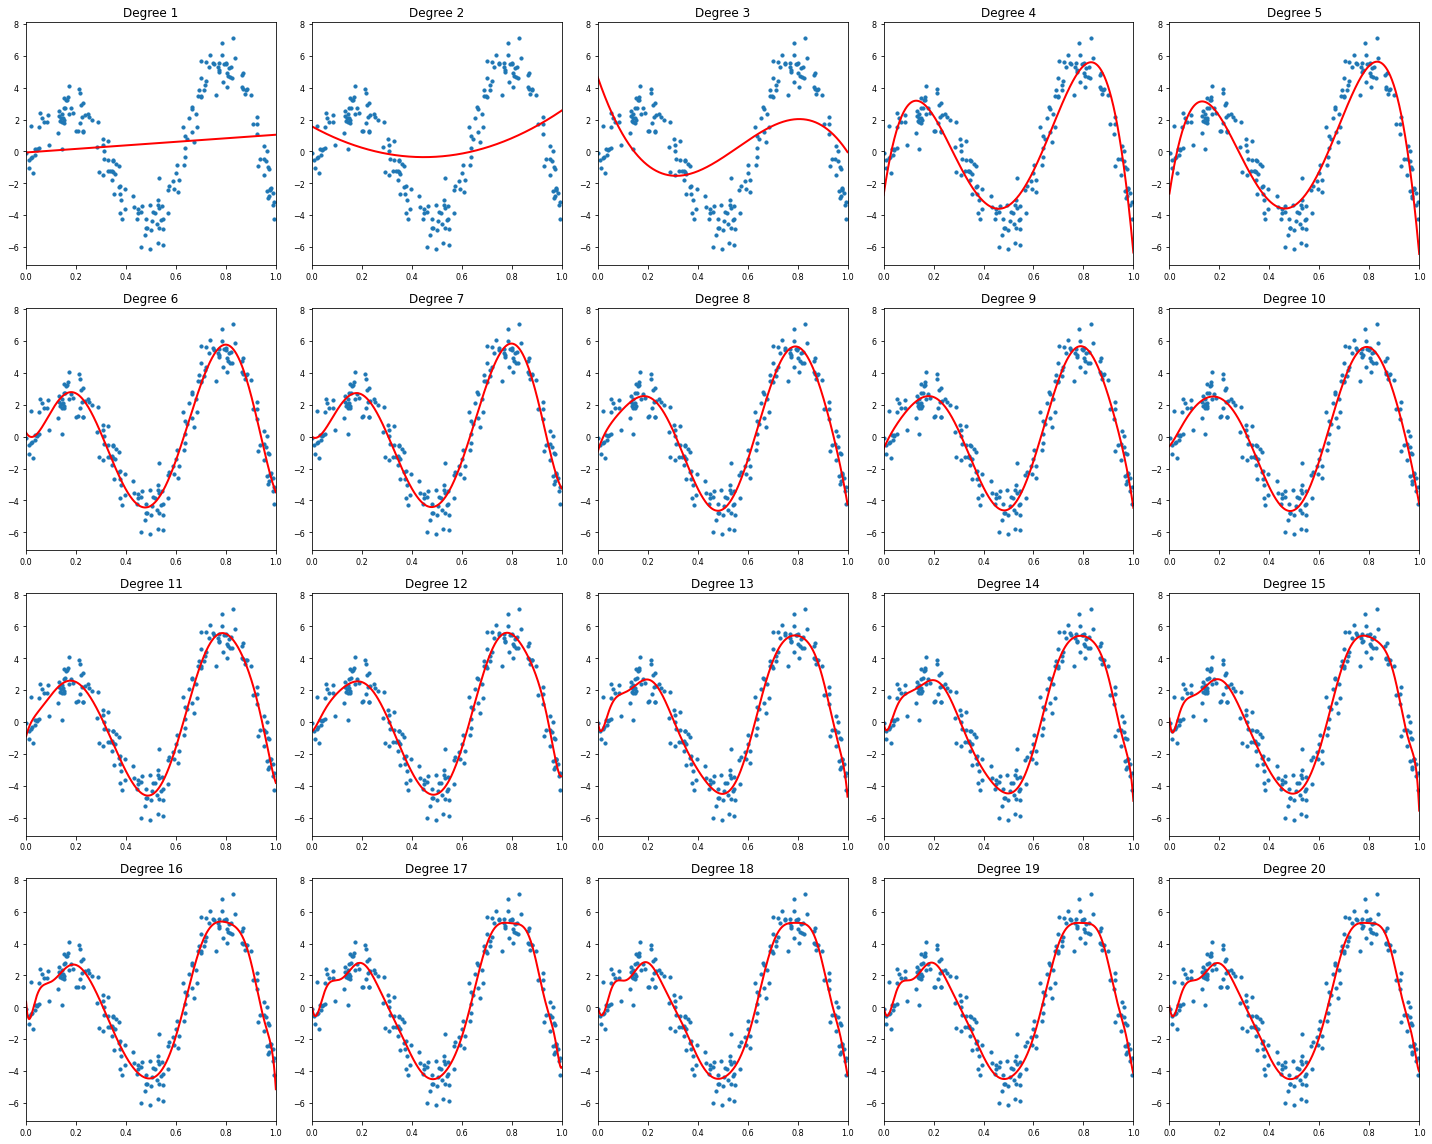

In [4]:
# Set up the plot grid
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Generate a sequence of 1000 numbers between 0 and 1 for plotting
t = np.linspace(0, 1, 1000)

for d in range(1, 21):  # Loop over polynomial degrees from 1 to 20
    # Fit a polynomial model of degree d
    coefs = np.polyfit(x, y, d)
    fhat = np.polyval(coefs, t)

    # Plot the original data and the fitted polynomial
    ax = axes[d-1]  # Get the corresponding subplot axis
    ax.scatter(x, y, s=10)  # Plot data points
    ax.plot(t, fhat, color='red', linewidth=2)  # Plot the fitted polynomial
    ax.set_title(f'Degree {d}')  # Set title to indicate the degree of the polynomial
    ax.tick_params(labelsize=8)  # Optional: Adjust tick label size if necessary
    ax.set_xlim([0, 1])  # Ensure consistent x-axis limits
    ax.set_ylim([min(y) - 1, max(y) + 1])  # Adjust y-axis limits based on data

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Data-driven choice**: It can be chosen based on a model selection procedure, e.g., by comparing models sequentially via ANOVA or, equivalently, by tracking the



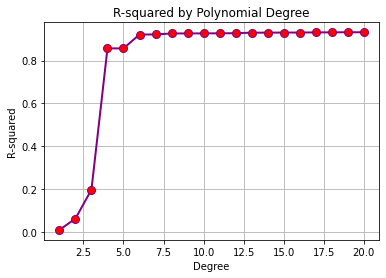

In [5]:
# Initialize an array to store the R-squared values
R = np.zeros(20)

# Loop over polynomial degrees from 1 to 20
for d in range(1, 21):
    # Create polynomial features
    X = np.vander(x, N=d+1, increasing=True)
    # Fit a linear model
    model = sm.OLS(y, X).fit()
    # Store the R-squared value
    R[d-1] = model.rsquared

# Plot the R-squared values
plt.plot(range(1, 21), R, 'o-', linewidth=2, color='purple', markersize=8, markerfacecolor='red')
plt.xlabel('Degree')
plt.ylabel('R-squared')
plt.title('R-squared by Polynomial Degree')
plt.grid(True)
plt.show()


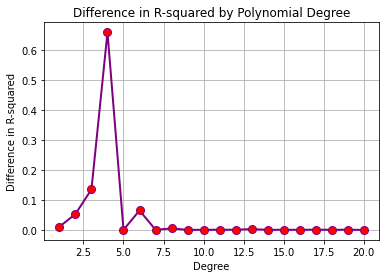

In [6]:

# Calculate the differences in R-squared values starting with the intercept-only model
# Prepend 0 to the R array for the intercept-only model, then compute differences
R_diff = np.diff(np.insert(R, 0, 0))

# Plot the differences in R-squared values
plt.plot(range(1, 21), R_diff, 'o-', linewidth=2, color='purple', markersize=8, markerfacecolor='red')
plt.xlabel('Degree')
plt.ylabel('Difference in R-squared')
plt.title('Difference in R-squared by Polynomial Degree')
plt.grid(True)
plt.show()


**Question**: Is using the higher degree of polynomial the better?

1. There is a real danger of overfitting.
   <span style="color: orange;">Theorem (Interpolation)</span>- If the $\mathbf{x}_i$ are distinct, there is a polynomial of degree $d=n-1$ that interpolates the data.
2. Let $X$ to be design matrix corresponding to the polynomial model. The higher the degree of polynomial, the higher the <span style="color: orange;">condition number</span> of the corresponding design matrix.

   The condition number in the context of linear models, particularly for the design matrix of these models, is a <span style="color: orange;"> measure of the matrix's sensitivity to small changes in its input data</span>. It reflects the stability and numerical well-being of the matrix inversion process used in solving the linear equations that underlie the model.

   Except when the degree is small, a polynomial model is poorly conditioned in terms of linear dependencies.

    The design matrix is a <span style="color: orange;">Vandermonde matrix</span>
    $$
    \mathbf{X}=\left(\begin{array}{cccc}
    1 & x_1 & \cdots & x_1^d \\
    1 & x_2 & \cdots & x_2^d \\
    \vdots & \vdots & & \vdots \\
    1 & x_n & \cdots & x_n^d
    \end{array}\right)
    $$

    Such a matrix is known to be poorly conditioned, even for moderate values of $d$. This seems true beyond $d \geq 10$ and persists regardless of the sample size.


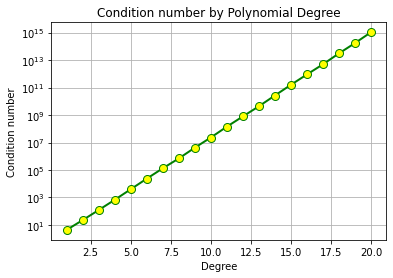

In [7]:
K = np.zeros(20)  # Initialize an array to store the condition numbers

# Loop over polynomial degrees from 1 to 20
for d in range(1, 21):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))

    # Compute the condition number of the design matrix
    K[d-1] = cond(X_poly)

# Plot the condition numbers
plt.plot(range(1, 21), K, 'o-', linewidth=2, color='green', markersize=8, markerfacecolor='yellow')
plt.xlabel('Degree')
plt.ylabel('Condition number')
plt.title('Condition number by Polynomial Degree')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.grid(True)
plt.show()


### Piecewise constant model

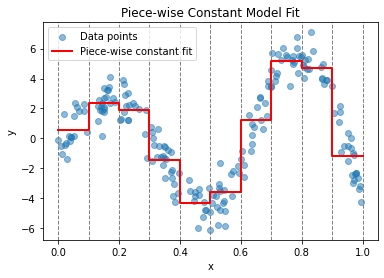

In [8]:
q = 10  # Number of bins
all_breaks = np.linspace(0, 1, q + 1)  # Create evenly spaced breaks between 0 and 1
val = np.zeros(q)  # Initialize array to store the mean values for each bin

# Calculate the mean y-value for each bin
for k in range(q):
    ind = (all_breaks[k] < x) & (x <= all_breaks[k+1])
    val[k] = np.mean(y[ind]) if np.any(ind) else 0  # Handle case where a bin might be empty

# Plot the original data
plt.scatter(x, y, alpha=0.5, label='Data points')

# Plot vertical lines for the bin boundaries
for b in all_breaks:
    plt.axvline(b, linestyle='dashed', color='grey', linewidth=1)

# Correcting the step function data
# We need to ensure the x values for the steps extend all the way through
extended_breaks = np.repeat(all_breaks, 2)[1:-1]
extended_vals = np.repeat(val, 2)

# Plot the piece-wise constant model
plt.step(extended_breaks, extended_vals, where='post', color='red', linewidth=2, label='Piece-wise constant fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piece-wise Constant Model Fit')
plt.legend()

# Show the plot
plt.show()


Theorem (Interpolation) - If the $\mathbf{x}_i$ are distinct, if the partition is fine enough, there is a piecewise constant function that interpolates the data.

In general, if the partition is fine enough, there is piecewise constant function that achieves the minimum empirical risk.


### Spline Model

A spline is a piecewise polynomial of some degree $d$ which is $d-1$ continuously differentiable.

Splines of degree $d$ constitute a linear space (of infinite dimension).
Given a partition of the real line into $q$ intervals defined by
$$
-\infty=a_0<a_1<\cdots<a_{q-1}<a_q=\infty
$$
the splines of degree $d$ based on this partition form a linear space of dimension $q+d$ (= number of intervals + degree).


**Linear Spline**: A linear spline is a piecewise linear function used to approximate a set of data points. It is composed of linear segments connected at certain points called knots.

In a linear spline, the function is continuous across the entire range of the input variable, including at the knots. This means there are no jumps or gaps in the spline function. However, while the function itself is continuous, <span style="color: orange;">its derivative (slope) is not</span> – the slope changes at each knot.



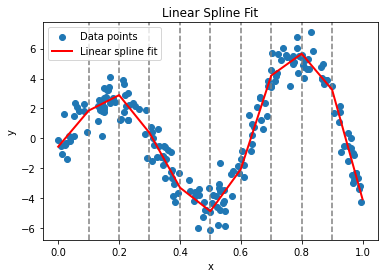

In [9]:
from scipy.interpolate import LSQUnivariateSpline

# Assuming x and y are already defined as in the previous examples

# Set degree d and number of knots q
d = 1  # Degree of the spline
q = 10  # Number of knots
# Define the inner breaks (knots for the spline) excluding the endpoints
inner_breaks = np.linspace(1/q, 1-1/q, q-1)

# Fit a linear spline to the data
# Note: LSQUnivariateSpline takes degree as the order, which is degree+1 for linear splines
spline = LSQUnivariateSpline(x, y, inner_breaks, k=d)

# Generate a sequence of 1000 numbers between 0 and 1 for plotting the spline
t = np.linspace(0, 1, 1000)
fhat = spline(t)  # Evaluate the spline model on the grid

# Plot the original data
plt.scatter(x, y, label='Data points')

# Add vertical lines for the spline knots
for b in inner_breaks:
    plt.axvline(b, linestyle='dashed', color='grey')

# Plot the fitted spline
plt.plot(t, fhat, color='red', linewidth=2, label='Linear spline fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Spline Fit')
plt.legend()

# Show the plot
plt.show()


**Cubic Spline**: change the degree $d=3$

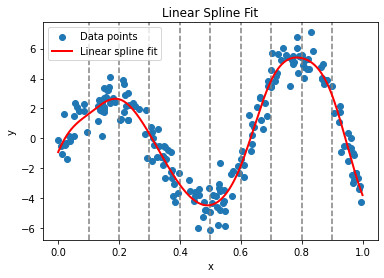

In [10]:
from scipy.interpolate import LSQUnivariateSpline

# Assuming x and y are already defined as in the previous examples

# Set degree d and number of knots q
d = 3  # Degree of the spline
q = 10  # Number of knots
# Define the inner breaks (knots for the spline) excluding the endpoints
inner_breaks = np.linspace(1/q, 1-1/q, q-1)

# Fit a linear spline to the data
# Note: LSQUnivariateSpline takes degree as the order, which is degree+1 for linear splines
spline = LSQUnivariateSpline(x, y, inner_breaks, k=d)

# Generate a sequence of 1000 numbers between 0 and 1 for plotting the spline
t = np.linspace(0, 1, 1000)
fhat = spline(t)  # Evaluate the spline model on the grid

# Plot the original data
plt.scatter(x, y, label='Data points')

# Add vertical lines for the spline knots
for b in inner_breaks:
    plt.axvline(b, linestyle='dashed', color='grey')

# Plot the fitted spline
plt.plot(t, fhat, color='red', linewidth=2, label='Linear spline fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Spline Fit')
plt.legend()

# Show the plot
plt.show()


## Trigonometric polynomial model

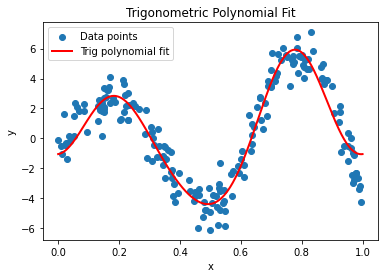

In [11]:

# Generate the design matrix for the trigonometric polynomial
# This includes constant, cos(2*pi*x), sin(2*pi*x), cos(4*pi*x), sin(4*pi*x), cos(6*pi*x), and sin(6*pi*x)
X = np.column_stack([np.ones(len(x)),  # for intercept
                     np.cos(2 * np.pi * x),
                     np.sin(2 * np.pi * x),
                     np.cos(2 * 2 * np.pi * x),
                     np.sin(2 * 2 * np.pi * x),
                     np.cos(2 * 3 * np.pi * x),
                     np.sin(2 * 3 * np.pi * x)])

# Convert x and X into a DataFrame for compatibility with statsmodels
data = pd.DataFrame(X, columns=['Intercept', 'cos(2πx)', 'sin(2πx)', 'cos(4πx)', 'sin(4πx)', 'cos(6πx)', 'sin(6πx)'])
data['y'] = y  # Add y values to the dataframe
data['x'] = x  # Add original x values to use for prediction

# Fit the trigonometric polynomial model using OLS
model = sm.OLS(data['y'], data.iloc[:, :-2]).fit()  # Exclude the last two columns which are 'y' and 'x'

# Predict y values across a range of x values for plotting
t = np.linspace(0, 1, 1000)
X_pred = np.column_stack([np.ones(len(t)),  # for intercept
                          np.cos(2 * np.pi * t),
                          np.sin(2 * np.pi * t),
                          np.cos(2 * 2 * np.pi * t),
                          np.sin(2 * 2 * np.pi * t),
                          np.cos(2 * 3 * np.pi * t),
                          np.sin(2 * 3 * np.pi * t)])
fhat = model.predict(X_pred)

# Plot the original data
plt.scatter(x, y, label='Data points')

# Plot the fitted trigonometric polynomial
plt.plot(t, fhat, color='red', linewidth=2, label='Trig polynomial fit')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Polynomial Fit')
plt.legend()

# Show the plot
plt.show()


Let's look at the conditional number of the corresponding design matrix of this model.

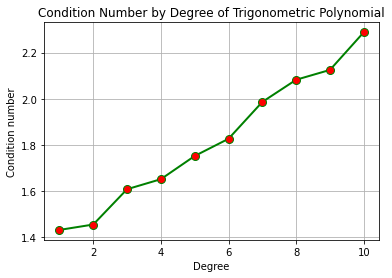

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond
n = len(x)  # Number of observations
K = np.zeros(10)  # Initialize array to store the condition numbers

# Loop through degrees from 1 to 10
for d in range(1, 11):
    # Initialize the design matrix for this degree
    # Each degree d adds two columns: cos(2*pi*k*x) and sin(2*pi*k*x) for k = 1 to d
    X = np.zeros((n, 2 * d))
    for k in range(1, d + 1):
        X[:, 2 * k - 2] = np.cos(2 * np.pi * k * x)  # Cosine terms
        X[:, 2 * k - 1] = np.sin(2 * np.pi * k * x)  # Sine terms

    # Add the intercept column to X
    X_with_intercept = np.c_[np.ones(n), X]  # Prepend a column of ones for the intercept

    # Compute the condition number of the design matrix
    K[d - 1] = cond(X_with_intercept)

# Plot the condition numbers
plt.plot(range(1, 11), K, 'o-', linewidth=2, color='green', markersize=8, markerfacecolor='red')
plt.xlabel('Degree')
plt.ylabel('Condition number')
plt.title('Condition Number by Degree of Trigonometric Polynomial')
plt.grid(True)
plt.show()


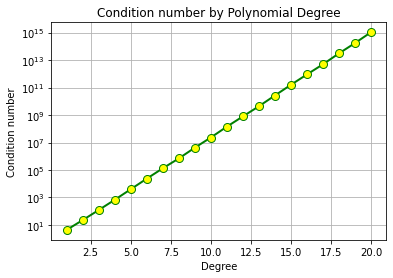

In [13]:
K = np.zeros(20)  # Initialize an array to store the condition numbers

# Loop over polynomial degrees from 1 to 20
for d in range(1, 21):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))

    # Compute the condition number of the design matrix
    K[d-1] = cond(X_poly)

# Plot the condition numbers
plt.plot(range(1, 21), K, 'o-', linewidth=2, color='green', markersize=8, markerfacecolor='yellow')
plt.xlabel('Degree')
plt.ylabel('Condition number')
plt.title('Condition number by Polynomial Degree')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.grid(True)
plt.show()